In [ ]:
# # -*- coding: utf-8 -*-
# """
# Created on 3/15/2020

# @author: Xin Huang
# """

# # import keras
# # from keras.datasets import mnist
# # from keras.models import Sequential
# # from keras.layers import Dense, Dropout
# # from keras.optimizers import RMSprop
# import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# import numpy as np

# # data = np.load('Sat_data_small.npz')
# from google.colab import drive
# drive.mount('content/')
# data = np.load('/content/content/My Drive/Colab Notebooks/Sat_data_small.npz')


# from sklearn.preprocessing import StandardScaler


# from sklearn.model_selection import train_test_split
# import numpy as np

# # data = np.load('Sat_data_small.npz')

# passive =1

# if passive ==1:
#     x_t = data['viirs']
#     y_t = data['label']
# else:
#     S1 = data['calipso']
#     Y1 = data['label']
    
# inds,vals = np.where(y_t>0)

# Y_t = y_t[inds]
# X_t = x_t[inds]


# scaler = StandardScaler()
# scaler.fit(X_t)
# X_t = scaler.transform(X_t)

# -*- coding: utf-8 -*-
"""
Created on 12-05-2019

@author: Xin Huang
"""

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
# from keras.optimizers import RMSprop

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import numpy as np

from google.colab import drive
drive.mount('content/')
# data = np.load('Sat_data_small.npz')
# data = np.load('/content/content/My Drive/Colab Notebooks/Sat_data_small.npz')
# data = np.load('/content/content/My Drive/Colab Notebooks/kddworkshop/train7.npz')
data = np.load('/content/content/My Drive/Colab Notebooks/kddworkshop/fulldata/train10.npz')

# passive = 1
#load common data
latlon = data['latlon']
iff = data['iff']

X_v = data['viirs']
Y_v = data['label']
print ('X_v shape:');
print (X_v.shape);

X_c = data['calipso']
Y_c = data['label']
print ('X_c shape:');
print (X_c.shape);

inds_v,vals_v = np.where(Y_v>0)
Y_v = Y_v[inds_v]
X_v = X_v[inds_v]
print ('X_v')
print (X_v)

inds_c,vals_c = np.where(Y_c>0)
Y_c = Y_c[inds_c]
X_c = X_c[inds_c]
print ('X_c')
print (X_c)

# process common data
Latlon = latlon[inds_v]
Iff = iff[inds_v]

print('original X_v: ', X_v.shape)
rows = np.where((X_v[:,0] >= 0) & (X_v[:,0] <= 83) & (X_v[:,15] > 100) & (X_v[:,15] < 400) & (X_v[:,16] > 100) & (X_v[:,16] < 400) & (X_v[:,17] > 100) & (X_v[:,17] < 400) & (X_v[:,18] > 100) & (X_v[:,18] < 400) & (X_v[:,19] > 100) & (X_v[:,19] < 400) & (X_v[:,10] > 0))
print("rows:", rows)
print("rows.shape:", len(rows))

Latlon = Latlon[rows]
Iff = Iff[rows]

Y_v = Y_v[rows]
X_v = X_v[rows]

Y_c = Y_c[rows]
X_c = X_c[rows]

print('after SZA X_v: ', X_v.shape)
print('after SZA X_c: ', X_c.shape)

#concanate common data
# X_v = np.concatenate((X_v, Latlon, Iff), axis=1)
X_c = np.concatenate((X_c, Latlon, Iff), axis=1)
print (X_v.shape)
print (X_c.shape)

X_v = np.nan_to_num(X_v)
X_c = np.nan_to_num(X_c)


Mounted at content/
X_v shape:
(2099451, 20)
X_c shape:
(2099451, 25)
X_v
[[ 97.43999481 -55.29999924   2.52999997 ... 246.61909485 246.91960144
  246.64631653]
 [ 97.43999481 -55.2899971    2.51999998 ... 247.22109985 247.5663147
  247.28843689]
 [ 97.40999603 -55.22999954   2.5        ... 248.27958679 248.7721405
  248.57876587]
 ...
 [ 94.68000031 -62.64999771   2.12999988 ... 228.96557617 228.62413025
  227.59910583]
 [ 94.68000031 -62.62999725   2.12999988 ... 229.51361084 229.17892456
  227.92941284]
 [ 94.66999817 -62.6099968    2.12999988 ... 230.20637512 230.03952026
  228.89453125]]
X_c
[[ 1.000e+00  2.000e+00  0.000e+00 ...        nan -9.999e+03        nan]
 [ 1.000e+00  2.000e+00  0.000e+00 ...        nan -9.999e+03        nan]
 [ 1.000e+00  2.000e+00  0.000e+00 ...        nan -9.999e+03        nan]
 ...
 [ 1.000e+00  1.000e+00  0.000e+00 ...        nan -9.999e+03        nan]
 [ 1.000e+00  1.000e+00  0.000e+00 ...        nan -9.999e+03        nan]
 [ 1.000e+00  1.000e+00  0

In [ ]:
# combine data and split latter to define ground truth for MLR
# from sklearn.linear_model import LinearRegression
n1=20
n2=25
X=np.concatenate((X_v, X_c), axis=1)
Y=Y_v
print (X.shape)
print (Y_v)
x_train, x_valid, y_train, y_valid = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=Y)

# x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp,
#                                                     test_size=0.5,
#                                                     random_state=0,
#                                                     stratify=y_temp)

# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_valid=sc_X.transform(x_valid)
# x_test=sc_X.fit_transform(x_test)

x_train_v = x_train[:, 0:20]
x_train_c = x_train[:, 20:45]
x_train_comm = x_train[:, 45:51]
x_train_src = x_train[:, 20:51]

print(x_train_v.shape)
print(x_train_c.shape)
print(x_train_comm.shape)
print(x_train_src.shape)
print(y_train.shape)

x_valid_v = x_valid[:, 0:20]
x_valid_c = x_valid[:, 20:45]
x_valid_comm = x_valid[:, 45:51]

print(x_valid_v.shape)
print(x_valid_c.shape)
print(x_valid_comm.shape)

# x_test_v = x_test[:, 0:20]
# x_test_c = x_test[:, 20:45]
# x_test_comm = x_test[:, 45:51]

# print(x_test_v.shape)
# print(x_test_c.shape)
# print(x_test_comm.shape)

x_train_pt = np.concatenate((x_train_v, x_train_comm),axis=1)
x_valid_pt = np.concatenate((x_valid_v, x_valid_comm),axis=1)


(704800, 51)
[[2]
 [2]
 [2]
 ...
 [3]
 [3]
 [3]]
(493360, 20)
(493360, 25)
(493360, 6)
(493360, 31)
(493360, 1)
(211440, 20)
(211440, 25)
(211440, 6)


In [ ]:
data_test = np.load('/content/content/My Drive/Colab Notebooks/kddworkshop/fulldata/test_142_day.npz')

passive =1

#load common data
latlon_test = data_test['latlon']
iff_test = data_test['iff']

# if passive ==1:
x_t_test = data_test['viirs']
y_t_test = data_test['label']
# else:
x_s_test = data_test['calipso']
y_s_test = data_test['label']
    
inds_test,vals_test = np.where(y_t_test>0)

# process common data
Latlon_test = latlon_test[inds_test]
Iff_test = iff_test[inds_test]

Y_t_test = y_t_test[inds_test]
X_t_test = x_t_test[inds_test]

Y_s_test = y_s_test[inds_test]
X_s_test = x_s_test[inds_test]

# 0 =< SZA <= 83
print('original X_t_test: ', X_t_test.shape)
rows_test = np.where((X_t_test[:,0] >= 0) & (X_t_test[:,0] <= 83) & (X_t_test[:,15] > 100) & (X_t_test[:,15] < 400) & (X_t_test[:,16] > 100) & (X_t_test[:,16] < 400) & (X_t_test[:,17] > 100) & (X_t_test[:,17] < 400) & (X_t_test[:,18] > 100) & (X_t_test[:,18] < 400) & (X_t_test[:,19] > 100) & (X_t_test[:,19] < 400) & (X_t_test[:,10] > 0))
print("rows_test:", rows_test)
print("rows_test.shape:", len(rows_test))

Latlon_test = Latlon_test[rows_test]
Iff_test = Iff_test[rows_test]

Y_t_test = Y_t_test[rows_test]
X_t_test = X_t_test[rows_test]

Y_s_test = Y_s_test[rows_test]
X_s_test = X_s_test[rows_test]

X_s_test = np.nan_to_num(X_s_test)
X_t_test = np.nan_to_num(X_t_test)

print('after SZA X_t_test: ', X_t_test.shape)
print('after SZA X_s_test: ', X_s_test.shape)

# pca = decomposition.PCA(n_components=20)
# pca.fit(X_s_test)
# X_s_test = pca.transform(X_s_test)
# print (X_s_test.shape)

#concanate common data
# X_t_test = np.concatenate((X_t_test, Latlon_test, Iff_test), axis=1)
X_s_test = np.concatenate((X_s_test, Latlon_test, Iff_test), axis=1)

print (X_s_test.shape)
print (X_t_test.shape)

X_test=np.concatenate((X_t_test, X_s_test), axis=1)

# scaler_t = StandardScaler()
# scaler_t.fit(X_t_test)
# X_t_test = scaler_t.transform(X_t_test)

# scaler_s = StandardScaler()
# scaler_s.fit(X_s_test)
# X_s_test= scaler_s.transform(X_s_test)

x_test2=sc_X.transform(X_test)

# x_train_v = x_train[:, 0:20]
# x_train_c = x_train[:, 20:45]
# x_train_comm = x_train[:, 45:51]
# print(x_train_v.shape)
# print(x_train_c.shape)
# print(x_train_comm.shape)

# x_valid_v = x_valid[:, 0:20]
# x_valid_c = x_valid[:, 20:45]
# x_valid_comm = x_valid[:, 45:51]

# print(x_valid_v.shape)
# print(x_valid_c.shape)
# print(x_valid_comm.shape)

X_t_test = x_test2[:, 0:20]
x_test_c2 = x_test2[:, 20:45]
x_test_comm2 = x_test2[:, 45:51]


# DLR imputed target domain
# x_test_t_pt = model_reg.predict(X_t_test)
# print(x_test_t_pt.shape)

x_test_pt_test = np.concatenate((X_t_test, x_test_comm2),axis=1)
print(x_test_pt_test.shape)


original X_t_test:  (132478, 20)
rows_test: (array([  1233,   1234,   1235, ..., 132403, 132404, 132405]),)
rows_test.shape: 1
after SZA X_t_test:  (55192, 20)
after SZA X_s_test:  (55192, 25)
(55192, 31)
(55192, 20)
(55192, 26)


In [ ]:
pip install captum

     |████████████████████████████████| 4.4MB 10.9MB/s 


In [ ]:
# Set random seed for reproducibility.
np.random.seed(131254)
import torch

torch.manual_seed(1)  # Set seed for reproducibility.


In [ ]:
# pytorch mlp for multiclass classification
from numpy import vstack
from numpy import argmax
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch import Tensor
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Softmax
from torch.nn import Module
from torch.nn import Dropout
from torch.nn import BatchNorm1d
from torch.optim import SGD,RMSprop,Adam
from torch.nn import CrossEntropyLoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
import torch

n_epochs = 25
lambda_ = 0.001
NUM = 26
# DIFFERECE_COL = 5
BATCH_SIZE = 1024

# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, X1, Y1):

        self.X=X1
        self.y=Y1
        print("self.X before fit_transform")
        print(self.X)
        print("self.y before fit_transform")
        print(self.y)
        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        print("self.X before fit_transform")
        print(self.X)
        print("self.y after fit_transform")
        print(self.y)

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # # input to very beginning hidden layer
        self.hidden = Linear(n_inputs, 128)
        kaiming_uniform_(self.hidden.weight, nonlinearity='relu')
        self.act = ReLU()
        # # input to beginning hidden layer
        self.hidden0 = Linear(128, 256)
        kaiming_uniform_(self.hidden0.weight, nonlinearity='relu')
        self.act0 = ReLU()
        # input to first hidden layer
        self.hidden1 = Linear(256, 128)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # second hidden layer
        self.hidden2 = Linear(128, 64)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # third hidden layer and output
        self.hidden3 = Linear(64, 6)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Softmax(dim=1)
        self.dropout = Dropout(p=0.5)
        self.batchnorm = BatchNorm1d(128)
        self.batchnorm0 = BatchNorm1d(256)
        self.batchnorm1 = BatchNorm1d(128)
        self.batchnorm2 = BatchNorm1d(64)

    # forward propagate input
    def forward(self, X):
        # # input to very first hidden layer
        X = self.hidden(X)
        X = self.batchnorm(X)
        X = self.act(X)
        X = self.dropout(X)
        # input to first hidden layer
        X = self.hidden0(X)
        X = self.batchnorm0(X)
        X = self.act0(X)
        X = self.dropout(X)
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.batchnorm1(X)
        X = self.act1(X)
        X = self.dropout(X)
        # second hidden layer
        X = self.hidden2(X)
        X = self.batchnorm2(X)
        X = self.act2(X)
        X = self.dropout(X)
        # output layer
        X = self.hidden3(X)
        X = self.act3(X)
        return X

# # prepare the dataset
# def prepare_data(path, X2, Y2):
#     # load the dataset
#     dataset = CSVDataset(path, X2, Y2)
#     # calculate split
#     train, test = dataset.get_splits()
#     # prepare data loaders
#     train_dl = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
#     test_dl = DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)
#     return train_dl, test_dl

# prepare the dataset - random split within a dataset
def prepare_data(X2_train, Y2_train, X2_test, Y2_test):
    # load the train dataset
    train = CSVDataset(X2_train, Y2_train)
    # load the test dataset
    test = CSVDataset(X2_test, Y2_test)
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
    test_dl = DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)
    return train_dl, test_dl


aggre_losses = []
aggre_train_acc = []
aggre_test_acc = []
aggre_train_tgt_acc = []

# train the model
def train_model(train_dl, test_dl, model):
    # define the optimization
    criterion = CrossEntropyLoss()
    optimizer = RMSprop(model.parameters(), lr=0.001)
    # enumerate epochs
    j = 0
    for epoch in range(n_epochs):
        j += 1
        # enumerate mini batches
        train_steps = len(train_dl)
        print("train_steps:", train_steps)
        epoch_loss = 0
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # print("epoch", 1)
            # print("yhat")
            # print(yhat.shape)
            # print(yhat)
            # print("targets")
            # print(targets.shape)
            # print(targets)
            # calculate loss
            loss = criterion(yhat, targets)
            epoch_loss += loss
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()
        print('Train ith Epoch %d result:' % epoch)
        # calculate train accuracy
        train_acc = evaluate_model(train_dl, model)
        aggre_train_acc.append(train_acc)
        print('train_acc: %.3f' % train_acc)

        # calculate test accuracy
        test_acc = evaluate_model(test_dl, model)
        aggre_test_acc.append(test_acc)
        print('test_acc: %.3f' % test_acc)

        epoch_loss = epoch_loss / train_steps
        aggre_losses.append(epoch_loss)
        print(f'epoch: {j:3} loss: {epoch_loss.item():6.4f}')

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        with torch.no_grad():
          yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        # convert to class labels
        yhat = argmax(yhat, axis=1)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

# prepare the data
# path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
# path = 'Sat_data_small.npz'
# train_dl, test_dl = prepare_data(path, X_t, Y_t)

# X_s = x_train_src
# Y_s = y_train

X_t = x_train_pt
Y_t = y_train

# X_s_test = X_s_test
# Y_s_test = Y_s_test
X_t_test = x_test_pt_test
Y_t_test = Y_s_test


train_tgt, test_tgt = prepare_data(X_t, Y_t, X_t_test, Y_t_test)
print("train_tgt")
print(train_tgt)
print(len(train_tgt.dataset))
print("test_tgt")
print(test_tgt)
print(len(test_tgt.dataset))
# define the network
model = MLP(NUM)
# train the model
train_model(train_tgt, test_tgt, model)

# evaluate the model
acc = evaluate_model(test_tgt, model)
print('Accuracy: %.3f' % acc)
# make a single prediction
# row = [5.1,3.5,1.4,0.2]
# yhat = predict(row, model)
# print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))


self.X before fit_transform
[[-0.25860354 -1.15918005 -0.06559525 ...  1.65943487 -1.99399076
  -0.51567848]
 [-0.07338116 -1.15862914  0.82158963 ... -0.61386271  0.4848845
   1.34519875]
 [ 0.06259143  0.20489521 -1.16085896 ...  1.65002284 -1.16769901
  -0.51567848]
 ...
 [-0.0305552  -1.24643854 -0.44327239 ...  1.66011902 -0.96112607
  -0.51567848]
 [-1.54606    -0.57866856 -0.81168575 ...  1.64380342  0.27831156
  -0.51567848]
 [-0.55142635 -1.1457387  -0.93710308 ...  1.65868855 -0.13483431
   4.22955846]]
self.y before fit_transform
[[2]
 [1]
 [1]
 ...
 [5]
 [1]
 [3]]
self.X before fit_transform
[[-0.25860354 -1.15918    -0.06559525 ...  1.6594349  -1.9939908
  -0.51567847]
 [-0.07338116 -1.1586292   0.82158965 ... -0.6138627   0.4848845
   1.3451988 ]
 [ 0.06259143  0.20489521 -1.160859   ...  1.6500229  -1.167699
  -0.51567847]
 ...
 [-0.0305552  -1.2464385  -0.44327238 ...  1.660119   -0.9611261
  -0.51567847]
 [-1.54606    -0.57866853 -0.81168574 ...  1.6438035   0.27831155

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train ith Epoch 0 result:
train_acc: 0.615
test_acc: 0.590
epoch:   1 loss: 1.4582
train_steps: 482
Train ith Epoch 1 result:
train_acc: 0.633
test_acc: 0.598
epoch:   2 loss: 1.4162
train_steps: 482
Train ith Epoch 2 result:
train_acc: 0.644
test_acc: 0.605
epoch:   3 loss: 1.4022
train_steps: 482
Train ith Epoch 3 result:
train_acc: 0.652
test_acc: 0.609
epoch:   4 loss: 1.3938
train_steps: 482
Train ith Epoch 4 result:
train_acc: 0.656
test_acc: 0.610
epoch:   5 loss: 1.3868
train_steps: 482
Train ith Epoch 5 result:
train_acc: 0.661
test_acc: 0.611
epoch:   6 loss: 1.3825
train_steps: 482
Train ith Epoch 6 result:
train_acc: 0.664
test_acc: 0.618
epoch:   7 loss: 1.3798
train_steps: 482
Train ith Epoch 7 result:
train_acc: 0.667
test_acc: 0.615
epoch:   8 loss: 1.3760
train_steps: 482
Train ith Epoch 8 result:
train_acc: 0.669
test_acc: 0.621
epoch:   9 loss: 1.3738
train_steps: 482
Train ith Epoch 9 result:
train_acc: 0.672
test_acc: 0.620
epoch:  10 loss: 1.3718
train_steps: 482


In [ ]:
#print("X_t_test.shape:", X_t_test[0:1000, :].shape)

In [ ]:
# try IntegratedGradients methods
from captum.attr import IntegratedGradients
model.eval()
ig = IntegratedGradients(model)

test_input_tensor = torch.from_numpy(X_t_test[0:10000, :]).type(torch.FloatTensor)
# test_input_tensor.requires_grad_()

attributions, delta = ig.attribute(test_input_tensor, target=1, return_convergence_delta=True)
print('IG Attributions.shape:', attributions.shape)
print('IG Attributions:', attributions)
print('Convergence Delta.shape:', delta.shape)
print('Convergence Delta:', delta)
ig_attr = attributions.detach().numpy()
print ("IntegratedGradients feature importance:")
np.mean(ig_attr, axis=0)

IG Attributions.shape: torch.Size([10000, 26])
IG Attributions: tensor([[-1.4487e-04, -3.2600e-04, -1.3806e-04,  ..., -9.4876e-05,
          9.4741e-06, -3.8865e-05],
        [-1.2899e-04, -2.4954e-04, -9.1572e-05,  ..., -9.5978e-05,
          7.9839e-06, -4.2742e-05],
        [-1.1093e-04, -2.8892e-04, -1.2327e-04,  ..., -1.1707e-04,
          1.5364e-05, -4.3753e-05],
        ...,
        [-1.7782e-04, -1.0260e-04, -1.7341e-04,  ..., -9.7385e-04,
         -1.3308e-04,  3.8500e-04],
        [-7.6098e-05, -1.1281e-04, -8.6080e-05,  ..., -3.4579e-04,
         -2.4307e-04,  1.0535e-04],
        [-1.6207e-04, -4.1606e-05, -1.0768e-04,  ..., -4.0683e-04,
         -2.1123e-04,  1.0165e-04]], dtype=torch.float64)
Convergence Delta.shape: torch.Size([10000])
Convergence Delta: tensor([-1.4901e-04,  2.6737e-04,  1.6811e-04,  ..., -1.0085e-03,
        -1.4718e-04,  8.0286e-05], dtype=torch.float64)


array([-2.13276066e-02,  1.38985212e-04, -4.27738365e-02,  2.60758734e-03,
        1.00635925e-01, -1.73564677e-03,  3.60835679e-02, -3.60253786e-02,
        8.06399710e-03,  1.02759923e-02, -6.01143595e-02, -7.25735247e-03,
        1.86437157e-01,  1.15279487e-01, -1.10734107e-01,  1.66573387e-01,
       -3.15436637e-02,  2.25506227e-02, -5.44934341e-03,  1.66684709e-04,
       -1.58726140e-02, -1.74000132e-02, -7.48733893e-04,  2.19853788e-03,
       -2.57326080e-03,  1.06038892e-02])

In [ ]:
from captum.attr import DeepLift, GradientShap, NoiseTunnel, FeatureAblation

model.eval()
# try GradientShap methods
gs = GradientShap(model)

#test_input_tensor = torch.from_numpy(X_t_test[0:10000, :]).type(torch.FloatTensor)
train_input_tensor = torch.from_numpy(X_t[0:10000, :]).type(torch.FloatTensor)

#gs_attr_test = gs.attribute(X_test, X_train)

attributions, delta = gs.attribute(test_input_tensor, train_input_tensor)
print('GS Attributions.shape:', attributions.shape)
print('GS Attributions:', attributions)
print('Convergence Delta.shape:', delta.shape)
print('Convergence Delta:', delta)
gs_attr = attributions.detach().numpy()
print ("GradientShap feature importance:")
np.mean(gs_attr, axis=0)

AssertionError: ignored

array([-0.06129128, -0.0058886 , -0.06257341,  0.00192995,  0.04636101,
       -0.03518321,  0.04270913,  0.00988453,  0.02653559,  0.01130471,
       -0.07879085, -0.03110981, -0.00635521,  0.11666037,  0.00205597,
        0.21193963, -0.03433734,  0.01368812,  0.01109411, -0.00321808,
       -0.02177643, -0.05784439,  0.00662213, -0.01660644,  0.04873635,
        0.0028816 ])

In [ ]:
1:1000
array([-0.06129128, -0.0058886 , -0.06257341,  0.00192995,  0.04636101,
       -0.03518321,  0.04270913,  0.00988453,  0.02653559,  0.01130471,
       -0.07879085, -0.03110981, -0.00635521,  0.11666037,  0.00205597,
        0.21193963, -0.03433734,  0.01368812,  0.01109411, -0.00321808,
       -0.02177643, -0.05784439,  0.00662213, -0.01660644,  0.04873635,
        0.0028816 ])

In [ ]:
#valid dataset
X_t = x_train_pt
Y_t = y_train

# X_s_test = X_s_test
# Y_s_test = Y_s_test
X_t_valid = x_valid_pt
Y_t_valid = y_valid


train_tgt, valid_tgt = prepare_data(X_t, Y_t, X_t_valid, Y_t_valid)


# evaluate the model
acc = evaluate_model(train_tgt, model)
print('train ccuracy: %.3f' % acc)

# evaluate the model
acc = evaluate_model(valid_tgt, model)
print('valid ccuracy: %.3f' % acc)



self.X before fit_transform
[[-0.25860354 -1.15918005 -0.06559525 ...  1.65943487 -1.99399076
  -0.51567848]
 [-0.07338116 -1.15862914  0.82158963 ... -0.61386271  0.4848845
   1.34519875]
 [ 0.06259143  0.20489521 -1.16085896 ...  1.65002284 -1.16769901
  -0.51567848]
 ...
 [-0.0305552  -1.24643854 -0.44327239 ...  1.66011902 -0.96112607
  -0.51567848]
 [-1.54606    -0.57866856 -0.81168575 ...  1.64380342  0.27831156
  -0.51567848]
 [-0.55142635 -1.1457387  -0.93710308 ...  1.65868855 -0.13483431
   4.22955846]]
self.y before fit_transform
[[2]
 [1]
 [1]
 ...
 [5]
 [1]
 [3]]
self.X before fit_transform
[[-0.25860354 -1.15918    -0.06559525 ...  1.6594349  -1.9939908
  -0.51567847]
 [-0.07338116 -1.1586292   0.82158965 ... -0.6138627   0.4848845
   1.3451988 ]
 [ 0.06259143  0.20489521 -1.160859   ...  1.6500229  -1.167699
  -0.51567847]
 ...
 [-0.0305552  -1.2464385  -0.44327238 ...  1.660119   -0.9611261
  -0.51567847]
 [-1.54606    -0.57866853 -0.81168574 ...  1.6438035   0.27831155

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train ccuracy: 0.693
valid ccuracy: 0.693


In [ ]:
data_test = np.load('/content/content/My Drive/Colab Notebooks/kddworkshop/fulldata/test_155_day.npz')

passive =1

#load common data
latlon_test = data_test['latlon']
iff_test = data_test['iff']

# if passive ==1:
x_t_test = data_test['viirs']
y_t_test = data_test['label']
# else:
x_s_test = data_test['calipso']
y_s_test = data_test['label']
    
inds_test,vals_test = np.where(y_t_test>0)

# process common data
Latlon_test = latlon_test[inds_test]
Iff_test = iff_test[inds_test]

Y_t_test = y_t_test[inds_test]
X_t_test = x_t_test[inds_test]

Y_s_test = y_s_test[inds_test]
X_s_test = x_s_test[inds_test]

# 0 =< SZA <= 83
print('original X_t_test: ', X_t_test.shape)
rows_test = np.where((X_t_test[:,0] >= 0) & (X_t_test[:,0] <= 83) & (X_t_test[:,15] > 100) & (X_t_test[:,15] < 400) & (X_t_test[:,16] > 100) & (X_t_test[:,16] < 400) & (X_t_test[:,17] > 100) & (X_t_test[:,17] < 400) & (X_t_test[:,18] > 100) & (X_t_test[:,18] < 400) & (X_t_test[:,19] > 100) & (X_t_test[:,19] < 400) & (X_t_test[:,10] > 0))
print("rows_test:", rows_test)
print("rows_test.shape:", len(rows_test))

Latlon_test = Latlon_test[rows_test]
Iff_test = Iff_test[rows_test]

Y_t_test = Y_t_test[rows_test]
X_t_test = X_t_test[rows_test]

Y_s_test = Y_s_test[rows_test]
X_s_test = X_s_test[rows_test]

X_s_test = np.nan_to_num(X_s_test)
X_t_test = np.nan_to_num(X_t_test)

print('after SZA X_t_test: ', X_t_test.shape)
print('after SZA X_s_test: ', X_s_test.shape)

# pca = decomposition.PCA(n_components=20)
# pca.fit(X_s_test)
# X_s_test = pca.transform(X_s_test)
# print (X_s_test.shape)

#concanate common data
# X_t_test = np.concatenate((X_t_test, Latlon_test, Iff_test), axis=1)
X_s_test = np.concatenate((X_s_test, Latlon_test, Iff_test), axis=1)

print (X_s_test.shape)
print (X_t_test.shape)

X_test=np.concatenate((X_t_test, X_s_test), axis=1)

# scaler_t = StandardScaler()
# scaler_t.fit(X_t_test)
# X_t_test = scaler_t.transform(X_t_test)

# scaler_s = StandardScaler()
# scaler_s.fit(X_s_test)
# X_s_test= scaler_s.transform(X_s_test)

x_test2=sc_X.transform(X_test)

# x_train_v = x_train[:, 0:20]
# x_train_c = x_train[:, 20:45]
# x_train_comm = x_train[:, 45:51]
# print(x_train_v.shape)
# print(x_train_c.shape)
# print(x_train_comm.shape)

# x_valid_v = x_valid[:, 0:20]
# x_valid_c = x_valid[:, 20:45]
# x_valid_comm = x_valid[:, 45:51]

# print(x_valid_v.shape)
# print(x_valid_c.shape)
# print(x_valid_comm.shape)

X_t_test = x_test2[:, 0:20]
x_test_c2 = x_test2[:, 20:45]
x_test_comm2 = x_test2[:, 45:51]


# DLR imputed target domain
# x_test_t_pt = model_reg.predict(X_t_test)
# print(x_test_t_pt.shape)

x_test_pt_test = np.concatenate((X_t_test, x_test_comm2),axis=1)
print(x_test_pt_test.shape)


original X_t_test:  (319723, 20)
rows_test: (array([     0,      1,      2, ..., 319720, 319721, 319722]),)
rows_test.shape: 1
after SZA X_t_test:  (127868, 20)
after SZA X_s_test:  (127868, 25)
(127868, 31)
(127868, 20)
(127868, 26)


In [ ]:
X_t = x_train_pt
Y_t = y_train

# X_s_test = X_s_test
# Y_s_test = Y_s_test
X_t_test = x_test_pt_test
Y_t_test = Y_s_test


train_tgt, test_tgt = prepare_data(X_t, Y_t, X_t_test, Y_t_test)


# evaluate the model
acc = evaluate_model(test_tgt, model)
print('test Accuracy: %.3f' % acc)


self.X before fit_transform
[[-0.25860354 -1.15918005 -0.06559525 ...  1.65943487 -1.99399076
  -0.51567848]
 [-0.07338116 -1.15862914  0.82158963 ... -0.61386271  0.4848845
   1.34519875]
 [ 0.06259143  0.20489521 -1.16085896 ...  1.65002284 -1.16769901
  -0.51567848]
 ...
 [-0.0305552  -1.24643854 -0.44327239 ...  1.66011902 -0.96112607
  -0.51567848]
 [-1.54606    -0.57866856 -0.81168575 ...  1.64380342  0.27831156
  -0.51567848]
 [-0.55142635 -1.1457387  -0.93710308 ...  1.65868855 -0.13483431
   4.22955846]]
self.y before fit_transform
[[2]
 [1]
 [1]
 ...
 [5]
 [1]
 [3]]
self.X before fit_transform
[[-0.25860354 -1.15918    -0.06559525 ...  1.6594349  -1.9939908
  -0.51567847]
 [-0.07338116 -1.1586292   0.82158965 ... -0.6138627   0.4848845
   1.3451988 ]
 [ 0.06259143  0.20489521 -1.160859   ...  1.6500229  -1.167699
  -0.51567847]
 ...
 [-0.0305552  -1.2464385  -0.44327238 ...  1.660119   -0.9611261
  -0.51567847]
 [-1.54606    -0.57866853 -0.81168574 ...  1.6438035   0.27831155

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test Accuracy: 0.641


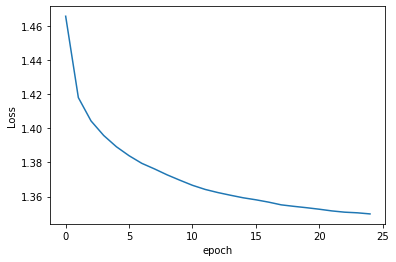

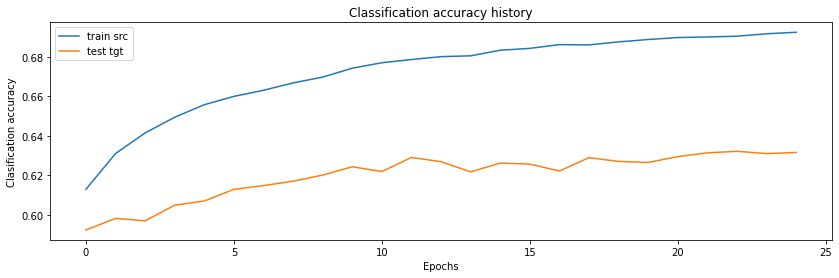

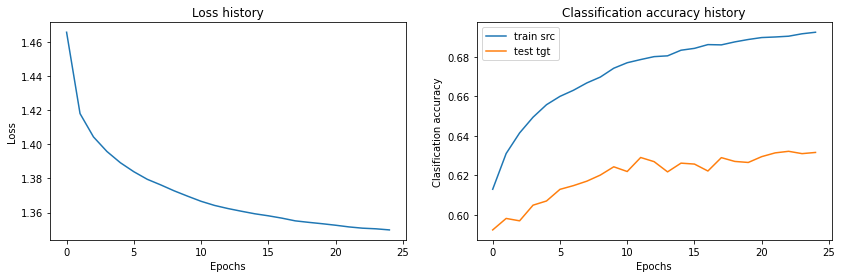

In [ ]:
#plot the loss
plt.plot(range(n_epochs), aggre_losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

#plot the train accuracy
plt.figure()
plt.plot(range(n_epochs), aggre_train_acc, '-', label='train src')
# plt.plot(range(n_epochs), aggre_train_tgt_acc, '-', label='train tgt')
plt.plot(range(n_epochs), aggre_test_acc, '-', label='test tgt')
plt.title('Classification accuracy history')
plt.xlabel('Epochs')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.gcf().set_size_inches(14, 4)


#plot the combined
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(range(n_epochs), aggre_losses, '-')
plt.title('Loss history')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(n_epochs), aggre_train_acc, '-', label='train src')
# plt.plot(range(n_epochs), aggre_train_tgt_acc, '-', label='train tgt')
plt.plot(range(n_epochs), aggre_test_acc, '-', label='test tgt')
plt.title('Classification accuracy history')
plt.xlabel('Epochs')
plt.ylabel('Clasification accuracy')
plt.legend()

plt.gcf().set_size_inches(14, 4)
# plt.show()

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
dataset = pd.read_csv(path)
dataset.shape
dataset.head()


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

dataset.Iris-setosa.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['skyblue', 'orange'], explode=(0.05, 0.05))

SyntaxError: ignored